In [2]:
import numpy as np
import pandas as pd

In [23]:
from matplotlib import pyplot as plt
%matplotlib inline

In [37]:
import seaborn as sns

In [20]:
from sklearn.manifold import TSNE

In [3]:
import hdbscan

In [1]:
from gensim.models import KeyedVectors
wv = KeyedVectors.load_word2vec_format("../models/model_big_one.vec", binary=False)

In [142]:
stop_words = """'здесь' 'где' 'там' 'наконец' 'теперь' 'уже' 'туда' 'еще' 'недалеко'
'далеко' 'сюда' 'скоро' 'из' 'оба' 'снова' 'когда' 'время' 'вероятно'
'никто' 'сам' 'наверняка' 'в' 'затем' 'тут' 'у' 'и' 'потом' 'они' 'видно'
'недавно' 'куда' 'вновь' 'тот' 'несколько' 'сразу' 'все' 'обратно' 'трок' 'невер' 'монт'
'чтобы' 'этот' 'только' 'прежде' 'неожиданно' 'почти' 'один' 'три' 'весь'
'отсюда' 'мы' 'сам' 'лишь' 'несомненно' 'таков' 'хотя' 'разумеется' 'впрочем' 'даже'
'себя' 'ведь' 'возможно' 'иначе' 'бы' 'этот' 'они' 'кроме' 'никогда' 'совсем' 'тоже' 'наверное'
'няться' 'рывать' 'рываться' 'вывать' 'чивать' 'авляться' 'си' 'мо' 'стро' 'кий'
'син' 'нап' 'прос' 'нок' 'тет' 'зак' 'ик' 'лок' 'ду' 'ск' 'бло' 'дро' 'бро' 'ната' 'алек' 'иня'
'рей' 'док' 'ник' 'ника' 'рик' 'нат' 'ман' 'кон' 'ско' 'арт' 'тик' 'стик'
 'голо' 'кро' 'кат' 'рика' 'ск' 'дока' 'коно' 'блок' 'чер' 'нок' 'кор'
 'дет' 'сла' 'кий' 'карт' 'бли' 'мета' 'корд' 'нал' 'мик' 'ло' 'скан'
 'мика' 'рейка' 'зак' 'ава' 'тый' 'соло' 'ска' 'па' 'нед' 'дженик'
 'артить' 'стет' 'поч' 'прик' 'тр' 'сос' 'ма' 'вста' 'ия' 'ти' 'брон' 'ый'
 'рет' 'тернер' 'ин' 'тестер' 'стов' 'стинка' 'рительно' 'таль' 'алекс'
 'ние' 'син' 'ната' 'рат' 'мо' 'ик' 'ком' 'вика' 'ренний' 'вок' 'сло'
 'сик' 'рация' 'лей' 'перет' 'мент' 'дов' 'кан' 'ковый' 'ковой' 'ва' 'ор'
 'тал' 'вить' 'ра' 'бека' 'тре' 'бый' 'зан' 'товка' 'вер' 'ба' 'бота'
 'уда' 'зат' 'чально' 'ранник' 'тер' 'кр' 'рина' 'нако' 'лов' 'стра'
 'трейсер' 'лин' 'мос' 'гон' 'ренно' 'пер' 'бо' 'спец' 'зам' 'мак' 'нец'
 'лок' 'ний' 'линка' 'ант' 'спой' 'рованный' 'арон' 'корас' 'ода' 'стент'
 'бок' 'клик' 'старка' 'ди' 'ный' 'фран' 'са' 'потра' 'стро' 'ина' 'катор'
 'ми' 'ненно' 'трик' 'ки' 'зательно' 'вого' 'вос' 'гно' 'шина' 'тра' 'лет'
 'чет' 'ент' 'након' 'пожалуйста' 'ага' 'сначала'
 'было'
"""
stop_words = set([w[1:-1] for w in stop_words.split()])

In [138]:
def get_data_for_word(word, N):
    sim = wv.similar_by_word(word, N)
    sim = np.array([w[0] for w in sim])
    sim = np.array(list(set(sim)-stop_words))
    sim_vecs = [wv[w] for w in sim]
    norm_sims_vecs = [v/np.sum(v**2) for v in sim_vecs]
    return sim,  norm_sims_vecs

# clustering

In [155]:
def plot_clusters(word, algorithm, args, kwds, N = 300):
    
    words, data = get_data_for_word(word, N)
    
    labels = algorithm(*args, **kwds).fit_predict(data)
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    
    tsne = TSNE(n_components=2, metric='cosine', perplexity=150)
    transformed = tsne.fit_transform(data)
    
    plt.scatter(transformed[:,0], transformed[:,1], c=colors)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    for i in range(max(labels)+1):
        print("LABEL: ", i)
        print(words[labels==i])
        print('-'*10)
    print("TRASH:")
    print(words[labels==-1])
    return labels, data, words

LABEL:  0
['арка' 'ограда' 'пристройка' 'бойница' 'неоготика' 'башенка'
 'псевдоготический' 'арочный' 'бастион' 'стрельчатый' 'неоготический']
----------
LABEL:  1
['дверной' 'запирать' 'задвигать' 'затворять' 'засов' 'задвижка' 'дверка'
 'створка' 'замочный' 'отпирать' 'незапертый' 'отворяться' 'дверь'
 'калитка' 'впускать' 'отворять' 'отмыкать']
----------
TRASH:
['магнуть' 'донжон' 'баторий' 'кастель' 'отмыкаться' 'открывать' 'через'
 'перестраивать' 'проход' 'цитадель' 'массивный' 'подвал' 'вести'
 'кованый' 'королева' 'фрика' 'усыпальница' 'поместительный' 'ворота'
 'рискнуть' 'миновать' 'сторожка' 'дворец' 'домина' 'взламывать'
 'трехарочный' 'затворяться' 'открываться' 'рама' 'сад' 'каретный' 'двор'
 'реставрировать' 'кольцо' 'ключ' 'подземелье' 'врата' 'выходить'
 'маленький' 'закрываться' 'пристроенный' 'вавельский'
 'забаррикадироваться' 'пристенный' 'баронство' 'выход' 'раскон' 'посреди'
 'триан' 'беренный' 'берние' 'бастионный' 'дома' 'вента' 'провожатый'
 'занда' 'стен' 'у

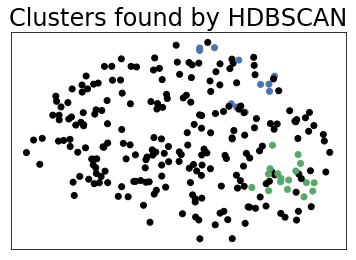

In [140]:
plot_clusters('замок', hdbscan.HDBSCAN, (), {'min_cluster_size': 6})

LABEL:  0
['величие' 'возвеличиваться' 'возвеличивать' 'прославлять' 'превозносить']
----------
LABEL:  1
['сам' 'лишь' 'несомненно' 'таков' 'хотя' 'разумеется' 'впрочем' 'даже'
 'себя' 'ведь' 'возможно' 'иначе' 'бы' 'этот' 'они' 'кроме' 'никогда']
----------
LABEL:  2
['бог' 'божий' 'разумение' 'благодать' 'господь' 'благость' 'истинно'
 'божественный' 'благословлять' 'всевышний' 'лик' 'господний']
----------
TRASH:
['ибо' 'чудо' 'одарить' 'одарять' 'мудрость' 'талант' 'даром' 'душа'
 'поистине' 'ум' 'благословение' 'дарительница' 'бесценный' 'избранник'
 'несравненный' 'сподобляться' 'разум' 'благоволение' 'слава' 'хвала'
 'благословенный' 'творец' 'провидец' 'взамен' 'воля' 'мудрый' 'благо'
 'провидчески' 'подательница' 'сокровище' 'вознаграждать' 'благодарность'
 'любовь' 'несказанный' 'доброта' 'счастие' 'прозорливость' 'хранитель'
 'редкостный' 'дух' 'бессмертие' 'чей' 'благоволить' 'щедрость'
 'способность' 'воистину' 'снисходить' 'изумлять' 'надежда' 'удача'
 'жизнь' 'создатель

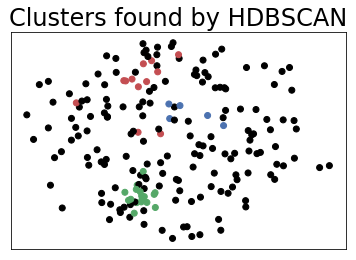

In [95]:
plot_clusters('дар', hdbscan.HDBSCAN, (), {'min_cluster_size': 5}, N=200)

LABEL:  0
['прихожая' 'лом' 'телефон' 'пакет' 'отмыкаться' 'подвал' 'дверца'
 'звонок' 'чемоданчик' 'взламывать' 'включатель' 'доступ'
 'распечатываться' 'кладовка' 'дверной' 'запирать' 'мышка' 'отщелкнуть'
 'брелком' 'кнопочка' 'задвигать' 'калькулятор' 'стек' 'замочек'
 'спрятать' 'ломик' 'секретер' 'адрес' 'замочка' 'тайник' 'кнопка' 'чулан'
 'номер' 'изнутри' 'четвертка' 'бардачок' 'засов' 'брелка' 'открывание'
 'сумка' 'шкатулка' 'бирка' 'задвижка' 'гарда' 'щелкнуть' 'внутрь'
 'кладовушка' 'мобильник' 'сумочка' 'свертка' 'сунуть' 'потайной'
 'домофон' 'дискета' 'входной' 'запираться' 'порыться' 'ящик' 'защелка'
 'сигнализация' 'дверка' 'чемодан' 'искомый' 'открывалка' 'ручка'
 'разводной' 'почта' 'крышка' 'захлопывать' 'чердачок' 'тайничок'
 'картонка' 'отвертка' 'сверток' 'коридорная' 'запор' 'портфель' 'железка'
 'замочный' 'спальня' 'отпирать' 'сейф' 'вынимать' 'шкаф' 'карточка'
 'комната' 'ларец' 'шкафчик' 'ларчик' 'ключик' 'гараж' 'выключатель'
 'врезной' 'гаечный' 'наверх' '

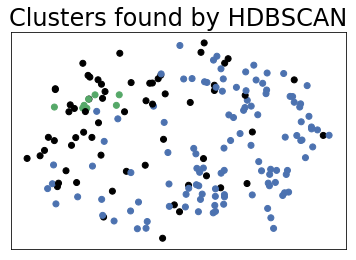

In [141]:
plot_clusters('ключ', hdbscan.HDBSCAN, (), {'min_cluster_size': 4}, N=200)

LABEL:  0
['нож' 'копье' 'дротик' 'топорик' 'топор' 'стрела' 'колчан' 'самострел'
 'топорище' 'палица' 'меч' 'клевец' 'лучник' 'засапожник' 'арбалет'
 'наточить' 'тетива' 'дунка' 'клинок' 'дрот' 'шелом' 'скак' 'самопал'
 'сулица' 'сабля' 'секира' 'наконечник' 'рогатин' 'кладенец' 'тесак'
 'засапожный']
----------
LABEL:  1
['мясо' 'рис' 'порей' 'кус' 'репа' 'филей' 'сало' 'чеснок' 'груша'
 'свинин' 'припас' 'сельдерей' 'скар' 'горох' 'дыня' 'впрок' 'репчатый'
 'пирог' 'голубец' 'нард' 'дичина' 'курага' 'хлеб' 'свинина' 'вис' 'салат'
 'кабан' 'финик' 'блюдо' 'требуха' 'перец' 'мед' 'вертел' 'кабанчик' 'суп'
 'мясной' 'плов' 'ар' 'сухарь' 'хлебец' 'батон' 'корица' 'конин' 'лучок'
 'вареный' 'орех' 'бараний' 'луков' 'тмин' 'морковь' 'ложка' 'кен' 'кура'
 'пекан' 'зайчатина' 'брюква' 'сушеный' 'каперс' 'козлятина' 'редька'
 'тушка' 'пулярка' 'джем' 'баранина' 'пир' 'капуста' 'булка' 'курица'
 'начинка' 'гречка' 'кур' 'томат' 'кабаний' 'уха' 'свиной' 'конина'
 'грудинка' 'хлебница' 'каша' '

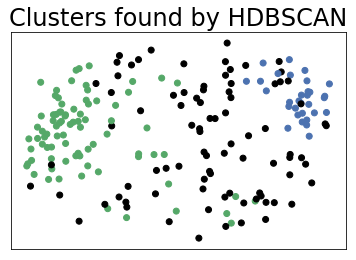

In [107]:
plot_clusters('лук', hdbscan.HDBSCAN, (), {'min_cluster_size': 5}, N=200)

LABEL:  0
['пламень' 'опалять' 'докрасна' 'уголек' 'раскалять' 'раскаленный'
 'неугасимый' 'раскаленно' 'горящий' 'раскаляться' 'пламенеть' 'добела'
 'обжигать' 'плавиться' 'луч' 'накалять' 'запылать' 'пылать' 'отсвет'
 'полыхание' 'гореть' 'отблеск' 'слепящий' 'негреющий']
----------
LABEL:  1
['холод' 'жара' 'душно' 'гарь' 'холодеть' 'удушливый' 'духота' 'леденеть'
 'зной' 'прохлада' 'мороз' 'стынуть' 'спертый' 'заледенеть' 'морозно'
 'холодить' 'теплый' 'коченеть']
----------
TRASH:
['жечь' 'жарко' 'нестерпимый' 'горячий' 'тепло' 'нестерпимо' 'жгучий'
 'сердце' 'пламен' 'огонь' 'неугасающий' 'запламенеть' 'дрожь' 'жарок'
 'жаркий' 'нутро' 'искра' 'холодная' 'воздух' 'неостывший' 'легкое'
 'отчего' 'адски' 'дым' 'согревающий' 'жила' 'угар' 'дохнуть'
 'невыносимый' 'душа' 'негасимый' 'ледяной' 'пекло' 'горячее' 'сушь'
 'холодок' 'гнев' 'стужа' 'влага' 'ослепляющий' 'воспламенять'
 'трепещущий' 'теплота' 'воспламеняться' 'неугасаемый' 'неуемно'
 'задыхание' 'кипеть' 'будто' 'пламенник'

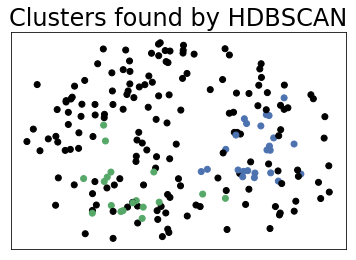

In [106]:
plot_clusters('жар', hdbscan.HDBSCAN, (), {'min_cluster_size': 5}, N=200)

LABEL:  0
['двоичный' 'отображаться' 'восьмизначный' 'битовый' 'ичный' 'шаговый'
 'обка' 'байт' 'терный' 'разделитель' 'лучать' 'памя' 'полняться'
 'обнуляться' 'диск' 'беззнаковый' 'дый' 'ос' 'стек' 'побитовый' 'байтный'
 'разрядность' 'процессор' 'инсталлировать' 'программер' 'пакетник'
 'списковый' 'компью' 'ом' 'етной' 'прога' 'смо' 'непустой' 'програм'
 'скачать' 'принтерный' 'кешировать' 'обнулять' 'ватель' 'ляться'
 'четность' 'строковый' 'флаговый' 'нажиматься' 'флешка' 'блять'
 'десятизначный' 'загрузчик' 'ме' 'дисковый' 'форматный' 'семизначный'
 'плоттер' 'иниматься' 'отбивка' 'константа' 'матрица' 'дисковод'
 'кратное' 'символьный' 'флоп' 'перекодировать' 'формат' 'фак' 'ся'
 'джойстик' 'считывать' 'таблица' 'стековый' 'вкладка' 'обнуление'
 'битный' 'микрокалькулятор' 'слот' 'спин' 'считываться' 'постер'
 'навливаться' 'шестнадцатиричный' 'бит' 'принтер' 'дравер' 'вычисляться'
 'ричный' 'масштабироваться' 'метка' 'одинарный' 'менная' 'принт'
 'дискетка']
----------
LABEL: 

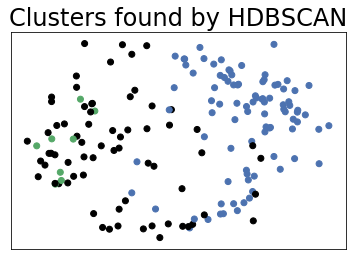

In [143]:
plot_clusters('бита', hdbscan.HDBSCAN, (), {'min_cluster_size': 4}, N=200)

LABEL:  0
['стенографирование' 'застенографировать' 'стенографически'
 'стенографироваться' 'стенограмма' 'стенографический']
----------
LABEL:  1
['закодировать' 'считывание' 'перекодирование' 'отладочный' 'компиляция'
 'обработчик' 'копирование' 'архивировать' 'редактирование'
 'перекомпиляция' 'расшифрование' 'файл' 'программатор' 'инсталлировать'
 'перекомпилировать' 'декодирование' 'расшифровывание' 'раскодирование'
 'авторизация' 'аналоговый' 'текстовый' 'текстовой' 'дублирование' 'код'
 'кодировка' 'перекодировка' 'расшифровка' 'кодированный'
 'отформатировать' 'некодировать' 'контекстный' 'зашифровка'
 'оцифрованный' 'форматировать' 'каталог' 'копироваться' 'перекодировать'
 'текстовик' 'формат' 'форматирование' 'считывать' 'скомпилировать'
 'вкладка' 'кодирование' 'архивирование' 'компилироваться' 'принтер'
 'полнотекстовый' 'декодировать' 'приложение' 'архивация']
----------
LABEL:  2
['протоколирование' 'документироваться' 'документирование' 'документарный'
 'документировать

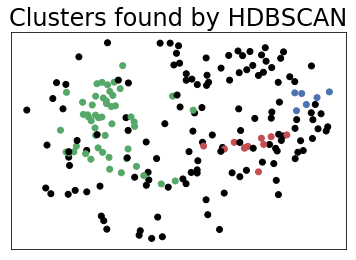

In [148]:
plot_clusters('запись', hdbscan.HDBSCAN, (), {'min_cluster_size': 4}, N=200)

# Embeddings

LABEL:  0
['скак' 'засапожный' 'лучник' 'секира' 'клинок' 'тетива' 'топор' 'сулица'
 'дротик' 'копье' 'шелом' 'кинжал' 'топорик' 'затуплять' 'наточить'
 'палица' 'клевец' 'засапожник' 'арбалет' 'рогатин' 'дунка' 'наконечник'
 'натачивать' 'топорище' 'самопал' 'меч' 'колчан' 'рогатина' 'стрела'
 'сабля' 'самострел' 'нож']
----------
LABEL:  1
['пулярка' 'порей' 'голубец' 'батон' 'лань' 'рис' 'салат' 'баран' 'скар'
 'ложка' 'вертел' 'каша' 'кабаний' 'грудинка' 'яблоко' 'вареный' 'кусок'
 'луков' 'зайчатина' 'анис' 'пирог' 'суп' 'перец' 'дичина' 'тушка'
 'блинчик' 'морковь' 'хлеб' 'сало' 'козлятина' 'гречка' 'масло' 'курица'
 'горчица' 'печеный' 'луковица' 'кус' 'припас' 'сельдерей' 'ар' 'уха'
 'репчатый' 'мясо' 'снедь' 'свинин' 'брюква' 'хлебец' 'свиной' 'плов'
 'курятина' 'редис' 'томат' 'фарш' 'тмин' 'мясной' 'индейка' 'петрушка'
 'окорок' 'сухарь' 'коза' 'свинина' 'конин' 'каперс' 'конина' 'сушеный'
 'корица' 'кабанчик' 'вилка' 'вилок' 'начинка' 'лучок' 'кен' 'баклажан'
 'джем' 'кабан

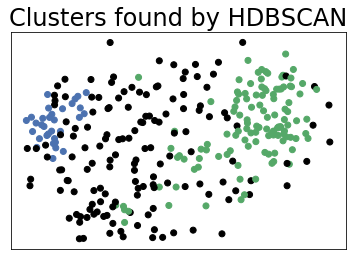

In [198]:
labels, data, words = plot_clusters('лук', hdbscan.HDBSCAN, (), {'min_cluster_size': 6}, N=300)

In [182]:
def make_embeddings(vectors, labels):
    resulted_vecs = []
    for i in range(max(labels)+1):
        summa = np.sum(vectors[labels == i], 0)
#         vec = summa*(sum(labels==i)/len(labels))
        vec = summa/np.sum(summa**2)
        resulted_vecs.append(vec)
    return resulted_vecs

In [199]:
result_vecs = make_embeddings(vectors=np.array(data), labels = np.array(labels))

# Testing

In [204]:
from matplotlib import pyplot as plt
%matplotlib inline

In [190]:
from testing_interface import make_data,\
                              visualize_pca,\
                              evaluate_weighted_ari,\
                              get_one_word_data,\
                              visualize_pca_one_word,\
                              visualize_tsne_one_word

DATASET = '../data/main/wiki-wiki/train.csv'

contexts, main_words, labels_data, word_list_uniq = make_data(df_file_name=DATASET,\
                 use_gensim_simple_preproc=False, use_mystem=True,\
                 throw_main_word=False, tokenize=True)

In [200]:
target_c = contexts[main_words=='лук']

In [195]:
def embedd_context(c):
    vecs = []
    for w in c:
        try:
            vecs.append(wv[w])
        except:
            continue
    
    tmp = np.sum(vecs, 0)
    return tmp/np.sum(tmp**2)

In [203]:
def find_most_similar(vec, sense_vecs):
    product = np.dot(sense_vecs, vec)
    return np.argmax(product), product

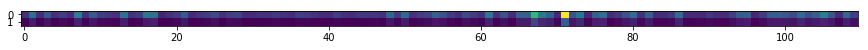

In [223]:
res_marks = []
p = []
for t in target_c:
    embed_c = embedd_context(t)
    label, product = find_most_similar(embed_c, result_vecs)
    p.append(product)
    res_marks.append(label)
    
plt.figure(figsize=(15,23))
plt.imshow(np.array(p).T)